# Importing Libraries and Data

In [80]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt


df_NAME=pd.read_csv("HEAT_210701.csv")

bins_H2S = []
for nam in df_NAME["NAME"]:
    NAM=str(nam)
    f_tmp = open("iso_"+NAM+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_H2S.append(bin_tmp)
    f_tmp.close()
    
bins_CO2 = []
for nam in df_NAME["NAME"]:
    NAM=str(nam)
    f_tmp = open("iso_"+NAM+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_CO2.append(bin_tmp)
    f_tmp.close()

Names_CO2=df_NAME["NAME"].to_numpy()
Name_list=Names_CO2
Names_H2S=df_NAME["NAME"].to_numpy()
dH_CO2 = np.array([df_NAME["SF6_HEAT"],df_NAME["N2_HEAT"]]).T
dH_H2S = np.array([df_NAME["SF6_HEAT"],df_NAME["N2_HEAT"]]).T

In [81]:
print(Name_list)

[  12  101  124  269  382  384  387  458  480  555  668  678  679  680
  801  802  833  852  881 1161 1217 1238 1304 1305 1314 1317 1340 1395
 1426 1552 1600 1634 1659 1664 1701 1703 1706 1722 1739 1781 1901 1929
 1948 1954 1961 2064 2066 2113 2153 2196 2199 2235 2261 2278 2282 2283
 2297 2362 2440 2456 2457 2458 2459 2495 2521 2545 2546 2547 2634 2677
 2715 2719 2721 2739 2746 2757 2759 2770 2774 2775 2786 2787 2788 2839
 2866 2880]


In [82]:
Arrh = lambda T,dH ,T_ref: np.exp(-dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

## Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p 
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.000001] = 0.000001
            q_IAST_tmp = pyiast.iast(p_tmp,
                                     iso_list,
                                     warningoff=True)
    else:
        try:
            p_tmp = P_norm_arr
            p_tmp[p_tmp<0.000001] = 0.000001
            #print(p_tmp)
            q_IAST_tmp = pyiast.iast(p_tmp,
                                    iso_list,
                                     warningoff=True)
        except:    
            try:
                #print('Initial guess error with P = ',P_par)
                x_IG = np.ones(len(p_tmp))/len(p_tmp)
                q_IAST_tmp = pyiast.iast(p_tmp,
                                        iso_list,adsorbed_mole_fraction_guess = x_IG,
                                        warningoff=True)
            except:
                try:
                    arg_min = np.argmin(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.05*np.ones(len(p_tmp))
                    x_IG[arg_min] = 1 - 0.05*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                except:
                    try:
                        arg_max = np.argmax(p_tmp)
                        p_tmp[p_tmp<0.000001] = 0.000001
                        x_IG = 0.05*np.ones(len(p_tmp))
                        x_IG[arg_max] = 1 - 0.05*(len(p_tmp)-1)
                        #print(x_IG)
                        q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                    except:
                        try:
                            arg_max = np.argmax(p_tmp)
                            p_tmp[p_tmp<0.000001] = 0.000001
                            x_IG = 0.15*np.ones(len(p_tmp))
                            x_IG[arg_max] = 1 - 0.15*(len(p_tmp)-1)
                            #print(x_IG)
                            q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)
                        except:
                            try:
                                arg_min = np.argmin(p_tmp)
                                p_tmp[p_tmp<0.000001] = 0.000001
                                x_IG = 0.01*np.ones(len(p_tmp))
                                x_IG[arg_min] = 1 - 0.01*(len(p_tmp)-1)
                                #print(x_IG)
                                q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                            except:
                                try:
                                    arg_max = np.argmax(p_tmp)
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    x_IG = 0.01*np.ones(len(p_tmp))
                                    x_IG[arg_max] = 1 - 0.01*(len(p_tmp)-1)
                                    #print(x_IG)
                                    q_IAST_tmp = pyiast.iast(p_tmp,
                                                    iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                                except:
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    x_IG = [0.9999, 0.0001]
                                    #print(x_IG)
                                    q_IAST_tmp = pyiast.iast(p_tmp,
                                                    iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)    
           
    return q_IAST_tmp

In [83]:
def sat_fraction(y_lead,q_lead_array, y_follow,q_follow_array):
    q_sat_lead_part, q_sat_lead_tot, q_des_lead = q_lead_array
    q_sat_fo, q_des_fo = q_follow_array
    numo = y_follow*(q_sat_lead_part - q_des_lead)+y_lead*q_des_fo
    denom = y_follow*(q_sat_lead_part - q_sat_lead_tot)+y_lead*q_sat_fo
    sat_frac = numo/denom
    return sat_frac

In [85]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    #print(P_low_part)
    P_low_part = np.reshape(P_low_part,len(iso))
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH,Tref_input)
    #print(P_high_part)
    P_high_part = np.reshape(P_high_part,len(iso))
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot



def rec(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    def x_err(xx):
        x_new,i_lead = x2x([xx, 1-xx],P_high,P_low,
                           iso_input, dH_input, Tref_input, 
                           yfeed,Tfeed)
        return (xx-x_new[0])**2
    #sol = optim.minimize(x_err,x_ini,method='COBYLA')
    sol = optim.least_squares(x_err,x_ini,bounds = [0,1])
    x_sol = sol.x
    _,i_lead = x2x([x_sol, 1- x_sol],P_high,P_low,
                   iso_input, dH_input, Tref_input, 
                   yfeed,Tfeed)
    #if i_lead  < 0.5:
    #    return -1
    Recovery = 1-(1-x_sol)/x_sol*yfeed[0]/yfeed[1]
    if Recovery < 0 or Recovery > 1:
        Recovery = 1-x_sol/(1-x_sol)*yfeed[1]/yfeed[0]
 #   return Recovery, i_lead, x_sol+
    return Recovery, i_lead, x_sol





In [129]:
T_feed_in = 313         # (K) temperature or 298K
T_tri = [298.15,]*2
#y_feed_in = np.array([0.83356,0.1644])
y_ethy = 9/10
#y_ethy = 0.83356
y_feed_in = np.array([1-y_ethy,y_ethy])
Rec_list_set = []
xx_list_set = []
leading_index_set = []
#Pl_list = np.linspace(0.004,0.5,30)
Pl_list = 1/(10**np.linspace(0.5,3,101))

for binn,dH,nam in zip(bins_CO2,dH_CO2,Name_list):
    Rec_list = []
    x_list = []
    leading_index = []
    
    for pl in Pl_list:
        try:
            x_guess = 0.05
            rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                      binn, dH, T_tri,y_feed_in, T_feed_in)
        except:
            try:
                x_guess = 0.4
                rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                          binn, dH, T_tri,y_feed_in, T_feed_in)
            except:
                try:
                    x_guess = 0.8
                    rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                              binn, dH, T_tri,y_feed_in, T_feed_in)                        
                except:
                    try:
                        x_guess = 0.9
                        rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                                  binn, dH, T_tri,y_feed_in, T_feed_in)                        
                    except:
                        try:
                            x_guess = 0.95
                            rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                                      binn, dH, T_tri,y_feed_in, T_feed_in)                        
                        except:
                            x_guess = 0.98
                            rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                                      binn, dH, T_tri,y_feed_in, T_feed_in)
                        
        #x_guess[0] = x_tmp*1.01
        Rec_list.append(rec_tmp)
        x_list.append(x_tmp[0])
        leading_index.append(l_ind)
    Rec_list_set.append(Rec_list)
    xx_list_set.append(x_list)
    leading_index_set.append(leading_index)
    list_2=[nam,x_tmp]
    print( list_2)

    

[12, array([0.91846109])]
[101, array([0.92800325])]


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure


[124, array([0.96552908])]
[269, array([0.94476921])]
[382, array([0.93963227])]
[384, array([0.95353917])]
[387, array([0.93478542])]
[458, array([0.90509237])]
[480, array([0.94592874])]
[555, array([0.93419414])]
[668, array([0.94092826])]
[678, array([0.93043489])]
[679, array([0.93267461])]
[680, array([0.94099779])]
[801, array([0.92145128])]
[802, array([0.95551289])]
[833, array([0.95878429])]
[852, array([0.94321489])]
[881, array([0.94888841])]
[1161, array([0.92554191])]
[1217, array([0.94510698])]
[1238, array([0.93180094])]
[1304, array([0.9205909])]
[1305, array([0.91787301])]
[1314, array([0.91943252])]
[1317, array([0.92070474])]
[1340, array([0.94950145])]
[1395, array([0.9247225])]
[1426, array([0.95224264])]
[1552, array([0.94061394])]
[1600, array([0.96588873])]
[1634, array([0.92994473])]
[1659, array([0.93712646])]
[1664, array([0.9379201])]
[1701, array([0.94615085])]
[1703, array([0.97768502])]
[1706, array([0.93077079])]
[1722, array([0.93396159])]
[1739, array

C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


[2199, array([0.96533043])]
[2235, array([0.92509176])]
[2261, array([0.92689621])]
[2278, array([0.93600747])]
[2282, array([0.91045278])]
[2283, array([0.90851468])]
[2297, array([0.94043804])]
[2362, array([0.93015691])]
[2440, array([0.93791996])]
[2456, array([0.95732635])]
[2457, array([0.96924902])]
[2458, array([0.96519271])]
[2459, array([0.96328109])]
[2495, array([0.93685991])]
[2521, array([0.94879677])]
[2545, array([0.93219101])]
[2546, array([0.93020315])]
[2547, array([0.92567762])]
[2634, array([0.8654625])]
[2677, array([0.9592797])]
[2715, array([0.92134507])]
[2719, array([0.89324019])]
[2721, array([0.89897918])]
[2739, array([0.93768121])]
[2746, array([0.92823155])]
[2757, array([0.9242043])]
[2759, array([0.87046971])]
[2770, array([0.9732687])]
[2774, array([0.95662415])]
[2775, array([0.95871898])]
[2786, array([0.9262261])]
[2787, array([0.89293835])]
[2788, array([0.90808373])]
[2839, array([0.88503755])]
[2866, array([0.91063736])]
[2880, array([0.56698884]

In [87]:
for i in range(len(Name_list)):
    print(i, Name_list[i])

0 12
1 101
2 124
3 269
4 382
5 384
6 387
7 458
8 480
9 555
10 668
11 678
12 679
13 680
14 801
15 802
16 833
17 852
18 881
19 1161
20 1217
21 1238
22 1304
23 1305
24 1314
25 1317
26 1340
27 1395
28 1426
29 1552
30 1600
31 1634
32 1659
33 1664
34 1701
35 1703
36 1706
37 1722
38 1739
39 1781
40 1901
41 1929
42 1948
43 1954
44 1961
45 2064
46 2066
47 2113
48 2153
49 2196
50 2199
51 2235
52 2261
53 2278
54 2282
55 2283
56 2297
57 2362
58 2440
59 2456
60 2457
61 2458
62 2459
63 2495
64 2521
65 2545
66 2546
67 2547
68 2634
69 2677
70 2715
71 2719
72 2721
73 2739
74 2746
75 2757
76 2759
77 2770
78 2774
79 2775
80 2786
81 2787
82 2788
83 2839
84 2866
85 2880


In [88]:
Rec_sort_tmp = []
for i in range(len(Rec_list_set)):
    rec_tmm = np.reshape(np.array(Rec_list_set[i]),[-1])
    Rec_sort_tmp.append(rec_tmm)
Rec_sort_tmp = np.array(Rec_sort_tmp)

Sort_target = np.reshape(np.array(Rec_sort_tmp)[:,-1],-1)
#print(Sort_target)
arg_st = np.argsort(Sort_target)[::-1]
Name_sort = np.array(Name_list)[arg_st]

Rec_sort = Rec_sort_tmp[arg_st,:]
leading_sort = np.array(leading_index_set)[arg_st]
#is_exp_sort = is_exp[arg_st]

print(Pl_list[-5]*100)
print(Name_sort)
print(Rec_sort[:,-5])

0.12589254117941662
[1703 2770 2457 2153 1600  124 2199 2458 2459 2066 2677  833 2775 2456
 2774 2196  802  384 1901 1929 1426 1340  881 2521 1701  480 1217  269
 1954  852 1948  680  668 1552 2297  382 1664 2440 2739 1659 2495 2278
  387  555 1722 1739  679 2064 2545 1238 1706  678 2546 2362 1634 2746
 1781  101 2261 2786 2547 1161 2235 1395 2757  801 2715 1317 1304 1314
   12 1305 1961 2866 2282 2283 2788  458 2721 2719 2787 2839 2759 2634
 2113 2880]
[0.9974259  0.99681714 0.99615215 0.9960895  0.99599693 0.99590287
 0.99598333 0.99596392 0.99573504 0.99525166 0.99524855 0.99512157
 0.99516854 0.99499602 0.99491764 0.99491019 0.99479732 0.9945525
 0.99450233 0.99442683 0.99437274 0.99404485 0.9939864  0.99394518
 0.99364151 0.99360494 0.99353696 0.99346888 0.99336512 0.9932679
 0.99316286 0.99300276 0.99297492 0.99294961 0.99291319 0.9928278
 0.99259821 0.99257431 0.99258634 0.99250097 0.99247477 0.99235258
 0.99221611 0.99213778 0.99209144 0.99196317 0.99194406 0.99189627
 0.991886

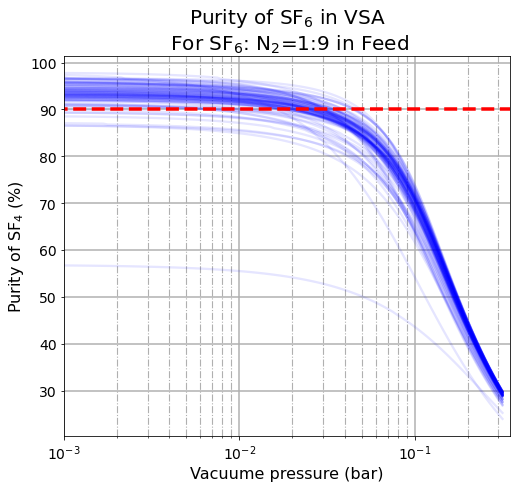

In [89]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = ['solid','dotted','dashdot','dashed'] + [(0,(3,5,1,5,1,5))]
c_list = ['k','b','g','r']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(xx_list_set,Name_sort):
    plt.semilogx(Pl_list,np.array(RR)*100,label = nn,
                 color = 'b',linewidth = 2.3,alpha=0.1)
    lc = lc + 1
    if lc  > len(L_styles)-1:
        cc = cc + 1
    if lc > len(L_styles)-1:
        lc = 0
    if cc > len(c_list)-1:
        cc = 0
plt.plot([0,20],[90,90],ls='--',lw='3.5',color='r')
## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
#plt.legend(fontsize = 13,loc = (1.02,0.08))
## x,y axis
plt.xlabel('Vacuume pressure (bar)',fontsize = 16)
plt.ylabel('Purity of SF$_4$ (%)',fontsize= 16)
plt.xlim([0.001, 0.35])
plt.xticks(fontsize =14)
plt.yticks(fontsize = 14)
#plt.xticks(ticks= [1.0, 2.0, 5,10,20,50,100],
    #       labels = ['1','2','5','10','20','50','100'],
      #     fontsize = 12.5)
#plt.yticks(ticks= [60,70,80,90,100],
#           labels = ['60','70','80','90','100'],
#           fontsize = 12.5)
plt.title('Purity of SF$_6$ in VSA\n For SF$_6$: N$_2$=1:9 in Feed',fontsize = 20)
plt.savefig('Recovery_vacuu_1vs9_full.png')
plt.show()

# Maximum Purity

## $x_{max}$ Cacluation

In [90]:
xx_max_list = []
for ii in range(len(xx_list_set)):
    xmax_tmp = np.max(xx_list_set[ii])
    xx_max_list.append(xmax_tmp)
    
arg_over90 = np.array(xx_max_list) > 0.9
Names_90 = Names_CO2[arg_over90]
dH_90 = dH_CO2[arg_over90]
bins_90 = np.array(bins_CO2)[arg_over90]
xx_max_90 = np.array(xx_max_list)[arg_over90]
xx_list_90 = np.array(xx_list_set)[arg_over90]

In [91]:
print('Name   :    Maximum purity')
for i in range(len(xx_max_list)):
    print(Name_list[i] ,':', xx_max_list[i])

Name   :    Maximum purity
12 : 0.9184610917372658
101 : 0.9280032475848855
124 : 0.9655290800571279
269 : 0.9447692067117
382 : 0.9396322708552984
384 : 0.9535391691512312
387 : 0.9347854203081428
458 : 0.9050923721346925
480 : 0.9459287402642065
555 : 0.9341941360253111
668 : 0.9409282574671803
678 : 0.9304348939318002
679 : 0.932674607830283
680 : 0.9409977854243443
801 : 0.9214512787363387
802 : 0.9555128914806686
833 : 0.9587842912957217
852 : 0.9432148851338751
881 : 0.9488884113161875
1161 : 0.9255419140092662
1217 : 0.9451069773815272
1238 : 0.9318009393903053
1304 : 0.9205909048738369
1305 : 0.9178730113972605
1314 : 0.9194325156293148
1317 : 0.9207047355374403
1340 : 0.9495014502310878
1395 : 0.9247224961547775
1426 : 0.9522426371592239
1552 : 0.9406139401523981
1600 : 0.9658887295255536
1634 : 0.9299447312219341
1659 : 0.9371264614468695
1664 : 0.9379201041870261
1701 : 0.9461508516138646
1703 : 0.9776850201289626
1706 : 0.9307707887911726
1722 : 0.9339615933332788
1739 : 0.

## Sorting

In [92]:
arg_soo = np.argsort(np.array(xx_max_list))[::-1]
xx_max_soo = np.array(xx_max_list)[arg_soo]
Names_soo = Names_CO2[arg_soo]


In [93]:
print(xx_max_soo.shape)

(86,)


## Bar Graph: All Max Purity

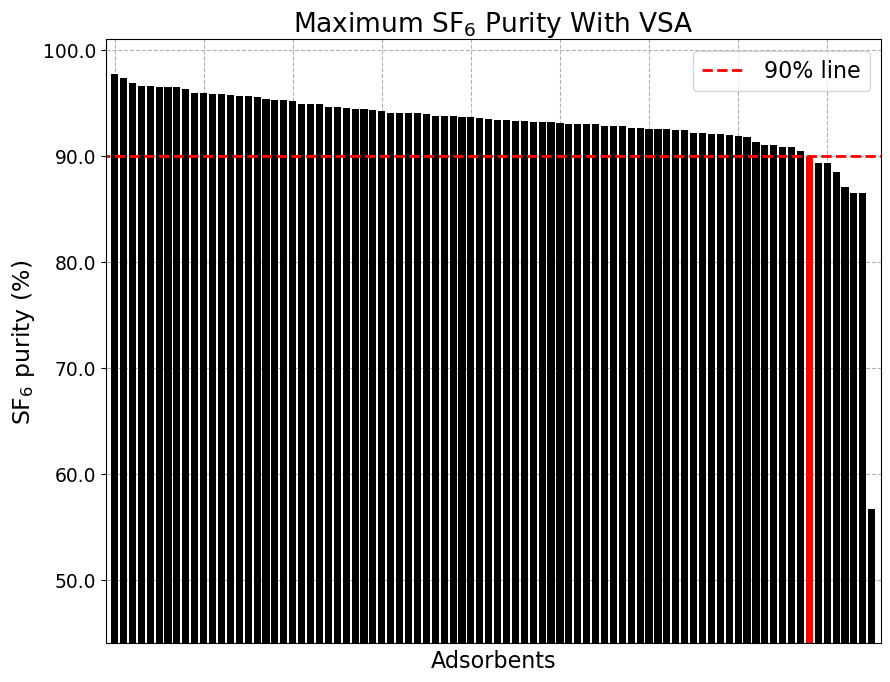

In [98]:
fig_xmax, ax_xmax = plt.subplots(figsize= [10,8],dpi = 100)
plt.grid(which = 'major', ls = '--')
ax_xmax.set_axisbelow(True)
line_90p = ax_xmax.plot([-5,len(xx_max_list)*1.01], [90,90], 'r--',
                        label = '90% line',lw = 2.0)
ax_xmax.bar(np.arange(len(xx_max_soo)),xx_max_soo*100,
            color = 'k')

innnnn = 78
ax_xmax.bar(innnnn, xx_max_soo[innnnn]*100,color = 'r')

plt.legend(fontsize = 16)
### x axis ###
#ax_xmax.set_xticks(np.arange(len(Names_so)))
#ax_xmax.set_xticklabels(Names_so,fontsize = 14,
#                        rotation  = 90)
ax_xmax.set_title('Maximum SF$_6$ Purity With VSA ',fontsize = 19)
ax_xmax.set_xlim([-1,len(Names_soo)])
ax_xmax.set_xlabel('Adsorbents',fontsize=16)

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)

for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)

### y axis ###
ax_xmax.set_ylim([44,101])
ax_xmax.set_ylabel('SF$_6$ purity (%)',fontsize=17)
ytick_xmax = ax_xmax.get_yticks()
ax_xmax.set_yticklabels(ytick_xmax,fontsize = 13.5)

plt.savefig('MaximumSF6_VSA.png')


## Sorting

In [99]:
arg_sort = np.argsort(xx_max_90)[::-1]
xx_max_so = xx_max_90[arg_sort]
xx_list_so = xx_list_90[arg_sort]
Names_so = Names_90[arg_sort]
dH_so = dH_90[arg_sort]
bins_so = bins_90[arg_sort]


## Bar Graph: Selected Maximum purity

[Text(0, 0, '84.0'),
 Text(0, 0, '86.0'),
 Text(0, 0, '88.0'),
 Text(0, 0, '90.0'),
 Text(0, 0, '92.0'),
 Text(0, 0, '94.0'),
 Text(0, 0, '96.0'),
 Text(0, 0, '98.0'),
 Text(0, 0, '100.0'),
 Text(0, 0, '102.0')]

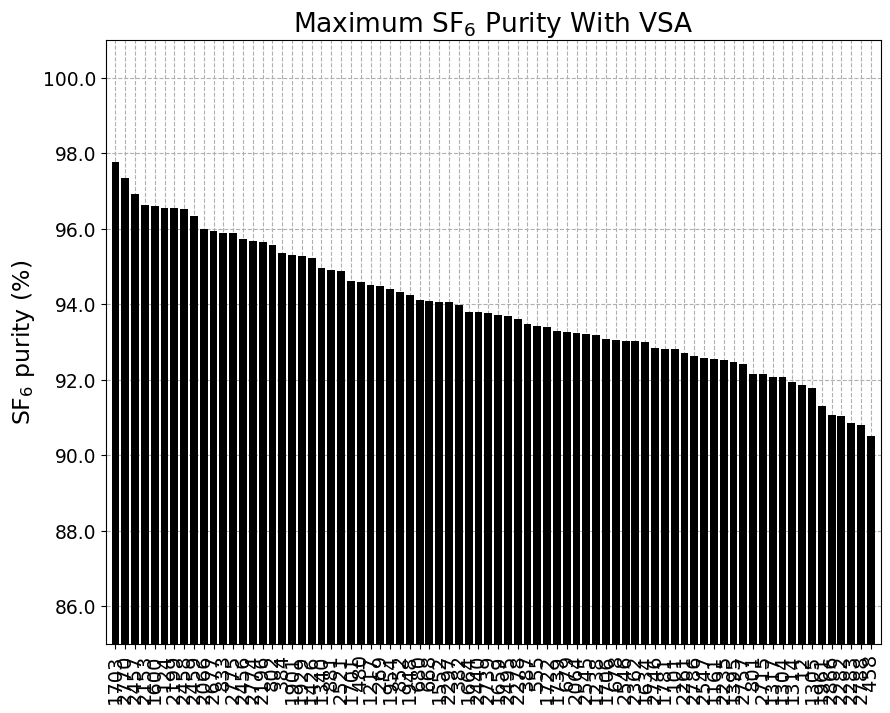

In [100]:
fig_xmax, ax_xmax = plt.subplots(figsize= [10,8],dpi = 100)
plt.grid(which = 'major', ls = '--')
ax_xmax.set_axisbelow(True)
ax_xmax.bar(np.arange(len(xx_max_so)),xx_max_so*100,
            color = 'k')

### x axis ###
ax_xmax.set_xticks(np.arange(len(Names_so)))
ax_xmax.set_xticklabels(Names_so,fontsize = 14,
                        rotation  = 90)
ax_xmax.set_title('Maximum SF$_6$ Purity With VSA ',fontsize = 19)
ax_xmax.set_xlim([-1,len(Names_so)])
#ax_xmax.set_xlabel('SF$_6$ purity (%)',fontsize=16)

### y axis ###
ax_xmax.set_ylim([85,101])
ax_xmax.set_ylabel('SF$_6$ purity (%)',fontsize=17)
ytick_xmax = ax_xmax.get_yticks()
ax_xmax.set_yticklabels(ytick_xmax,fontsize = 13.5)


# VSA Energy Consumption

In [101]:
gamma = 1.4
def VSA_E(Ph_in,Pl_in, T_in,eta_eff_in):
    P_ratio_term = (Ph_in/Pl_in)**((gamma-1)/gamma)-1
    E_comp = (gamma)/(gamma-1)*8.3145*T_in/eta_eff_in*P_ratio_term
    return E_comp
VSA_E(1,0.01,300,0.5)

47625.01377387299

In [102]:
from scipy.interpolate import interp1d

## Bar Graph: 80% of isentropic $\eta$

In [103]:
### CONDITIONS:
# T_feed_in, y_feed_in
eta_vac = 0.8

E_list = []
Pl_opt_list = []
cc = 0
for xxx in xx_list_so:
    f_int = interp1d(xxx,Pl_list)
    Pl_opt_tmp = f_int(0.9)
    E_tmp = VSA_E(1,Pl_opt_tmp,T_feed_in, eta_vac)
    Pl_opt_list.append(Pl_opt_tmp)
    E_list.append(E_tmp)
    
    #print(Names_so[cc], ':', E_tmp)
    cc = cc + 1
    

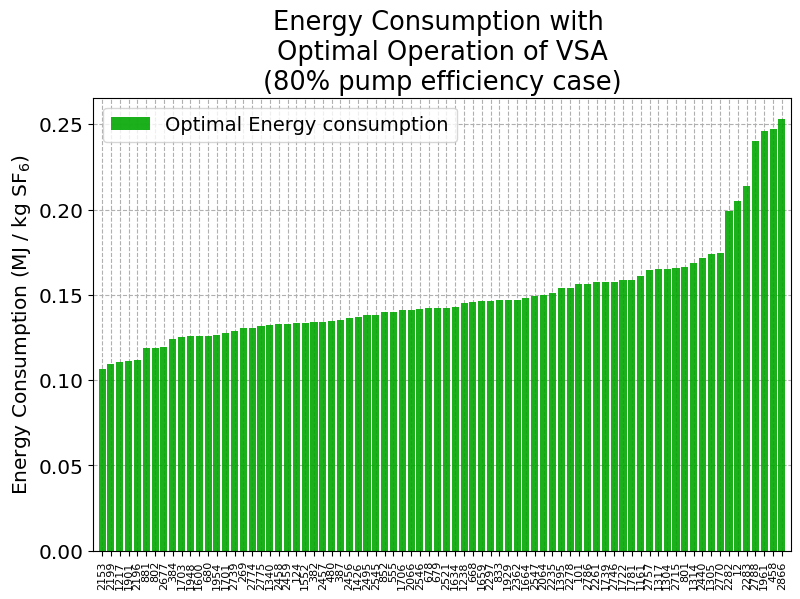

In [106]:
E_consu_arr = np.array(E_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_so[arg_sort_e]
dH_sort_e = dH_so[arg_sort_e]
bins_sort_e = bins_so[arg_sort_e]
Popt_sort_e = np.array(Pl_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/146060,
                color = [0,0.65,0], alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_{6}$)',fontsize = 14.5)
#ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of VSA\n(80% pump efficiency case)',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 8)
plt.yticks(fontsize = 14.5)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
plt.savefig('Energy_VSA.png')
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

E_consu_sort_80 = E_consu_sort

In [107]:
Mat_sav = np.concatenate((np.reshape(Names_sort_e,[len(Names_sort_e),1]),np.reshape(E_consu_sort,[len(E_consu_sort),1])),1)
Mat_sav_pd = pd.DataFrame(Mat_sav)
Mat_sav_pd.to_excel('Sec3_1_E_VSA.xlsx')
#print(E_consu_sort[0:10]/146060 )

In [108]:
print(Mat_sav.shape)

(78, 2)


## Bar Graph: Optimal Pressure

(-1.0, 78.0)

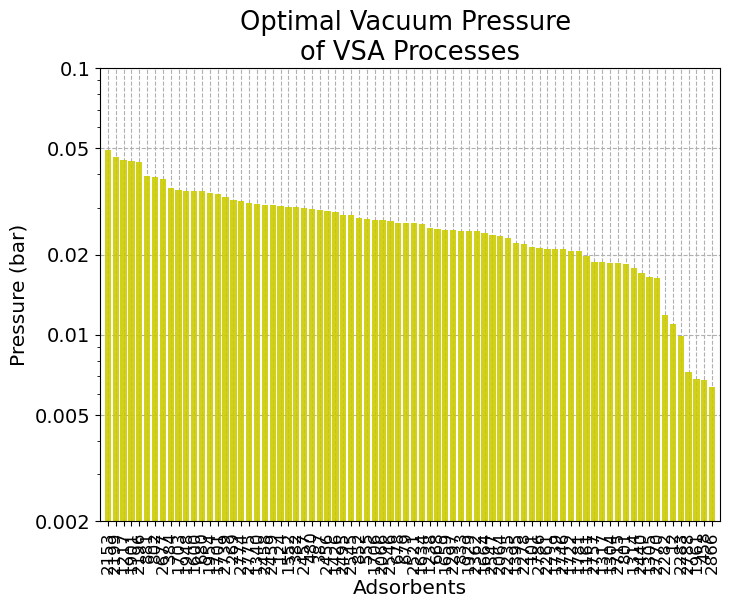

In [109]:
fig_e, ax_e = plt.subplots(figsize = [8,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(Popt_sort_e)),Popt_sort_e,
                color = [0.8,0.8,0], alpha = 0.89,
                label = 'Optimal Vacuum Pressure')
ax_e.set_yscale('log')
ax_e.set_ylabel('Pressure (bar)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Optimal Vacuum Pressure \nof VSA Processes',fontsize = 18.5)
ax_e.set_yticks([0.002,0.005,0.01,0.02,0.05,0.1])
ax_e.set_yticklabels([0.002,0.005,0.01,0.02,0.05,0.1],fontsize = 14)

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 12)
#yticklab = ax_e.get_yticks()
#ax_e.set_yticklabels(yticklab, fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
#frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
#plt.legend(fontsize = 14,loc = 'upper left')
#plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )



## Bar Graph: 40% of isentropic $\eta$

In [110]:
### CONDITIONS:
# T_feed_in, y_feed_in
eta_vac = 0.4

E_list = []
Pl_opt_list = []
cc = 0
for xxx in xx_list_so:
    f_int = interp1d(xxx,Pl_list)
    
    Pl_opt_tmp = f_int(0.9)
    E_tmp = VSA_E(1,Pl_opt_tmp,T_feed_in, eta_vac)
    Pl_opt_list.append(Pl_opt_tmp)
    E_list.append(E_tmp)
    
    #print(Names_so[cc], ':', E_tmp)
    cc = cc + 1


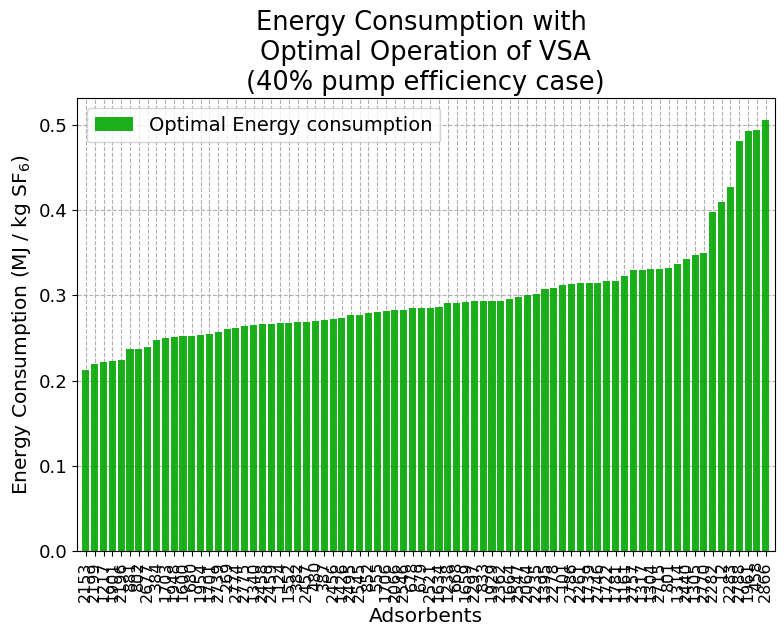

In [111]:
E_consu_arr = np.array(E_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_so[arg_sort_e]
dH_sort_e = dH_so[arg_sort_e]
bins_sort_e = bins_so[arg_sort_e]
Popt_sort_e = np.array(Pl_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/146060,
                color = [0,0.65,0], alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_{6}$)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of VSA\n(40% pump efficiency case)',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)
plt.yticks(fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
cooo = "copyri" + "ght"
print("The "+cooo + " of all the codes belongs to")
print("D",end="r.")
print("S.E.O.N", end=".G.B.I.N\n")
print("G.",end = "A.")
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )
E_consu_sort_40 = E_consu_sort

In [130]:
print(Names_sort_e)
print(E_consu_sort/146060 )

[2153 2199 1217 1901 2196  881  802 2677  384 1703 1948 1600  680 1954
 1701 2739  269 2774 2775 1340 2458 2459  124 1552  382 2457  480  387
 2456 1426 2495 2545  852  555 1706 2066 2546  678  679 2521 1634 1238
  668 1659 2297  833 1929 2362 1664 2547 2064 2235 1395 2278  101 2786
 2261 1739 2746 1722 1781 1161 2757 1317 1304 2715  801 1314 2440 1305
 2770 2282   12 2283 2788 1961  458 2866]
[0.851352   0.8764448  0.8866176  0.88983402 0.89481734 0.94912482
 0.9497284  0.95765067 0.99260676 1.00077255 1.00490084 1.00801627
 1.00832329 1.01364281 1.01999424 1.02979233 1.04308155 1.04515564
 1.05617903 1.05979989 1.0648257  1.06501251 1.06923324 1.07009742
 1.07358985 1.07464862 1.07898352 1.08405651 1.08962493 1.0939881
 1.10721056 1.10745515 1.11785775 1.12154035 1.12836803 1.12883679
 1.13207934 1.13935445 1.13941201 1.13948552 1.14460962 1.16268207
 1.1648816  1.17050588 1.1714556  1.17355589 1.17355779 1.17541052
 1.18425325 1.19264749 1.19925546 1.20761364 1.22990423 1.23189072
 

In [132]:
for i in range(len(Names_sort_e)):
    print(Names_sort_e[i])
    print(E_consu_sort_80[i]/146060)

2153
0.10641900038455991
2199
0.10955560035864141
1217
0.11082719993633067
1901
0.11122925260222882
2196
0.11185216801681547
881
0.11864060233314741
802
0.11871605025606478
2677
0.11970633362355519
384
0.1240758450863391
1703
0.12509656928717725
1948
0.1256126048220751
1600
0.12600203354511036
680
0.1260404112783251
1954
0.12670535132762878
1701
0.12749928039367187
2739
0.12872404070738178
269
0.1303851932811286
2774
0.13064445513432868
2775
0.13202237852075413
1340
0.13247498650259357
2458
0.13310321201259667
2459
0.13312656338683843
124
0.13365415441736733
1552
0.13376217765415443
382
0.13419873149603173
2457
0.1343310772655772
480
0.1348729401275959
387
0.1355070632083264
2456
0.1362031161267975
1426
0.13674851282727693
2495
0.13840132036808442
2545
0.13843189384422794
852
0.13973221899896984
555
0.14019254325745956
1706
0.14104600366746772
2066
0.14110459832773417
2546
0.14150991785832306
678
0.14241930601335517
679
0.14242650095061776
2521
0.14243568944523227
1634
0.14307620234243

## Bar Graph: 20% of isentropic $\eta$

In [113]:
### CONDITIONS:
# T_feed_in, y_feed_in
eta_vac = 0.2

E_list = []
Pl_opt_list = []
cc = 0
for xxx in xx_list_so:
    f_int = interp1d(xxx,Pl_list)
    
    Pl_opt_tmp = f_int(0.9)
    E_tmp = VSA_E(1,Pl_opt_tmp,T_feed_in, eta_vac)
    Pl_opt_list.append(Pl_opt_tmp)
    E_list.append(E_tmp)
    
    #print(Names_so[cc], ':', E_tmp)
    cc = cc + 1

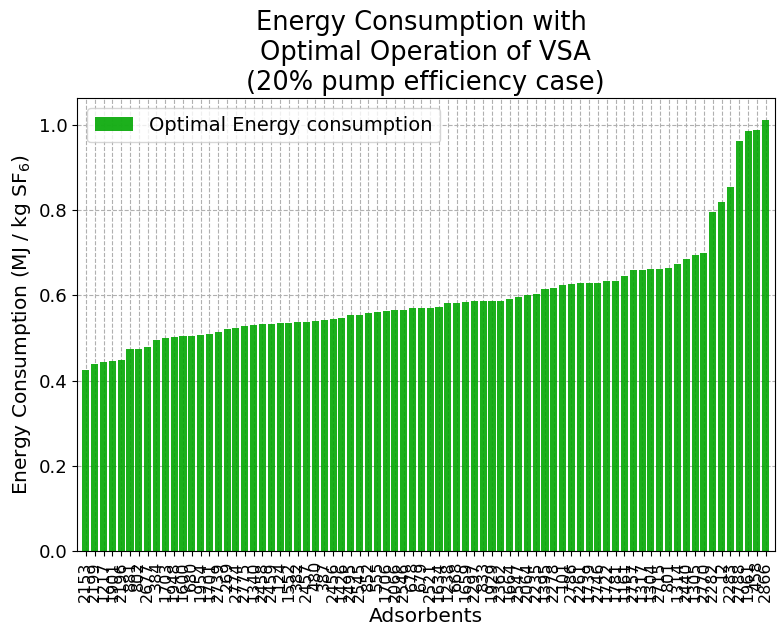

In [114]:
E_consu_arr = np.array(E_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_so[arg_sort_e]
dH_sort_e = dH_so[arg_sort_e]
bins_sort_e = bins_so[arg_sort_e]
Popt_sort_e = np.array(Pl_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/146060,
                color = [0,0.65,0], alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_{6}$)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of VSA\n(20% pump efficiency case)',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)
#yticklab = ax_e.get_yticks()
plt.yticks(fontsize = 13)
#ax_e.set_yticklabels(yticklab, fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

E_consu_sort_20 = E_consu_sort

In [115]:
print(E_consu_sort[:5]/146060)

[0.425676   0.4382224  0.4433088  0.44491701 0.44740867]


## Bar Graph: 10% of isentropic $\eta$

In [116]:
### CONDITIONS:
# T_feed_in, y_feed_in
eta_vac = 0.1

E_list = []
Pl_opt_list = []
cc = 0
for xxx in xx_list_so:
    f_int = interp1d(xxx,Pl_list)
    
    Pl_opt_tmp = f_int(0.9)
    E_tmp = VSA_E(1,Pl_opt_tmp,T_feed_in, eta_vac)
    Pl_opt_list.append(Pl_opt_tmp)
    E_list.append(E_tmp)
    
    #print(Names_so[cc], ':', E_tmp)
    cc = cc + 1


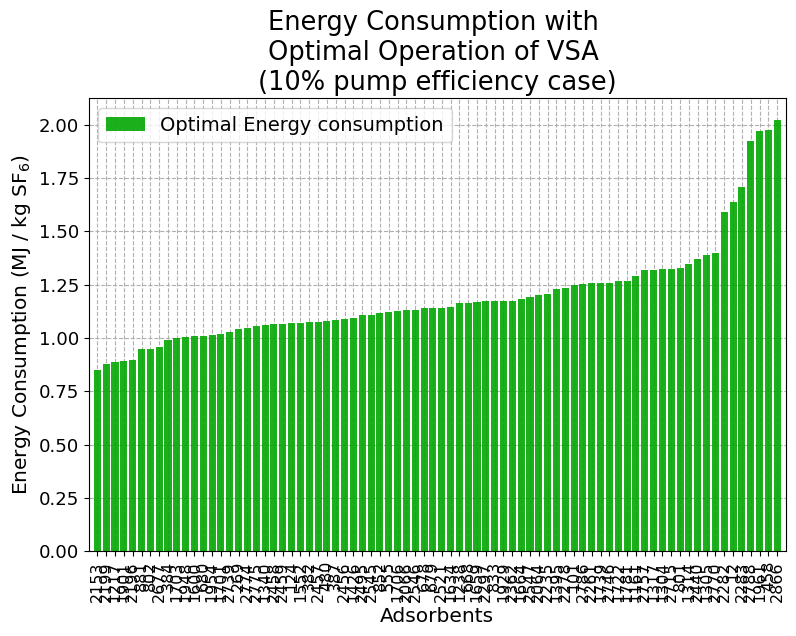

In [123]:
E_consu_arr = np.array(E_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_so[arg_sort_e]
dH_sort_e = dH_so[arg_sort_e]
bins_sort_e = bins_so[arg_sort_e]
Popt_sort_e = np.array(Pl_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/146060,
                color = [0,0.65,0], alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_{6}$)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of VSA \n(10% pump efficiency case)',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)
plt.yticks(fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )
E_consu_sort_10 = E_consu_sort

In [124]:
print(E_consu_sort[0:5]/146060)

[0.851352   0.8764448  0.8866176  0.88983402 0.89481734]


## Scatter: P--E Diagram

### Option 1

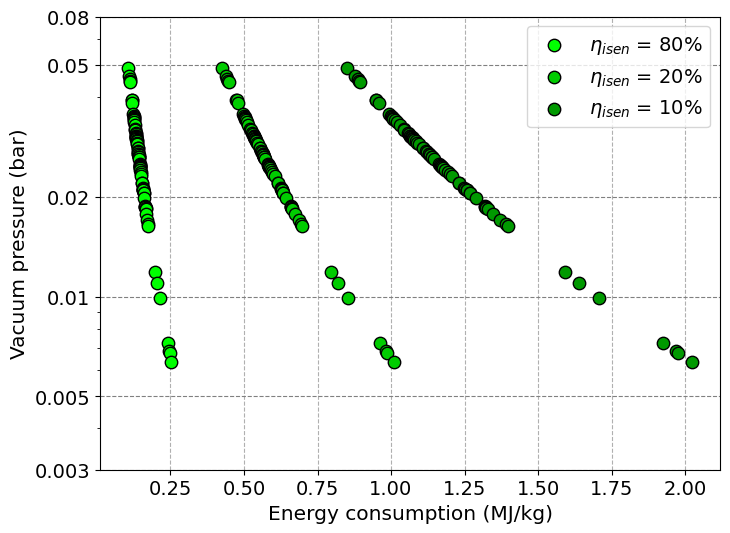

In [125]:
fig_o1,ax_o1 = plt.subplots(figsize = [8,6],dpi = 100)
plt.scatter(E_consu_sort_80/146060, Popt_sort_e, color = [0,1,0],
            edgecolor = 'black',
            label = '$\eta_{isen}$ = 80%',s = 80)
plt.scatter(E_consu_sort_20/146060, Popt_sort_e, color = [0,0.8,0],
            edgecolor = 'black',
            label = '$\eta_{isen}$ = 20%',s = 80)
plt.scatter(E_consu_sort_10/146060, Popt_sort_e, color = [0,0.6,0],
            edgecolor = 'black',
            label = '$\eta_{isen}$ = 10%', s= 80)


plt.xticks(fontsize = 14)
plt.legend(fontsize = 14)

ax_o1.set_yscale('log')
ax_o1.set_yticks([0.003,0.005,0.01,0.02,0.05,0.07])
ax_o1.set_yticklabels([0.003,0.005,0.01,0.02,0.05,0.08],fontsize = 14)

ax_o1.set_xlabel('Energy consumption (MJ/kg)',fontsize = 14.5)
ax_o1.set_ylabel('Vacuum pressure (bar)',fontsize = 14.5)


plt.grid(which = 'major', ls='--')
ax_o1.set_axisbelow(True)
ax_o1.yaxis.grid(color='gray', linestyle='dashed')
fig_o1.savefig('P_E_diag_op1_log.png')

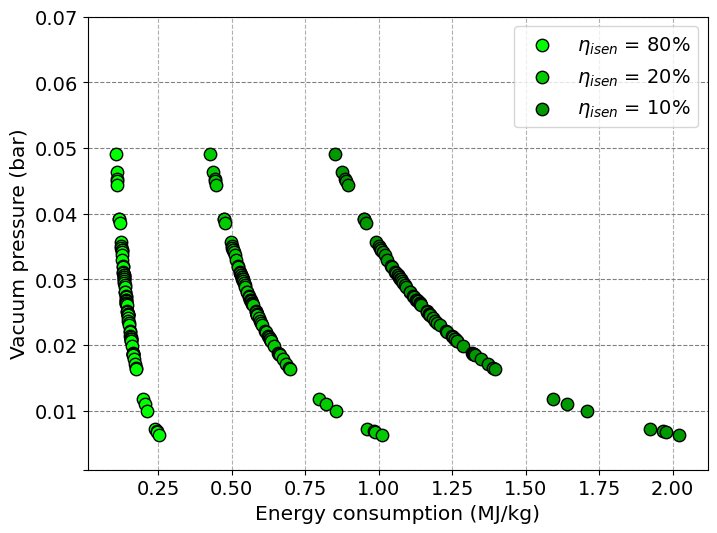

In [126]:
### Normal scale
fig_o1,ax_o1 = plt.subplots(figsize = [8,6],dpi = 100)
plt.scatter(E_consu_sort_80/146060, Popt_sort_e, color = [0,1,0],
            edgecolor = 'black',
            label = '$\eta_{isen}$ = 80%',s = 80)
plt.scatter(E_consu_sort_20/146060, Popt_sort_e, color = [0,0.8,0],
            edgecolor = 'black',
            label = '$\eta_{isen}$ = 20%',s = 80)
plt.scatter(E_consu_sort_10/146060, Popt_sort_e, color = [0,0.6,0],
            edgecolor = 'black',
            label = '$\eta_{isen}$ = 10%', s= 80)


plt.xticks(fontsize = 14)
plt.legend(fontsize = 14)

ax_o1.set_yticks([0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07])
ax_o1.set_yticklabels([None,0.01,0.02,0.03,0.04,0.05,0.06,0.07],
                      fontsize = 14,rotation = 0)

ax_o1.set_xlabel('Energy consumption (MJ/kg)',fontsize = 14.5)
ax_o1.set_ylabel('Vacuum pressure (bar)',fontsize = 14.5)


plt.grid(which = 'major', ls='--')
ax_o1.set_axisbelow(True)
ax_o1.yaxis.grid(color='gray', linestyle='dashed')
fig_o1.savefig('P_E_diag_op1_normal.png')


### Option 2

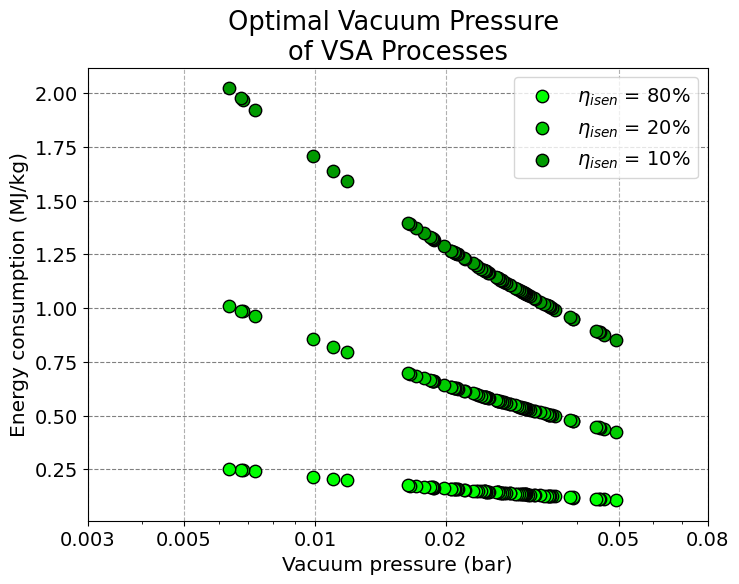

In [127]:
fig_o2,ax_o2 = plt.subplots(figsize = [8,6],dpi = 100)

ax_o2.scatter(Popt_sort_e,E_consu_sort_80/146060, color =[0,1,0],
              edgecolor = 'black',
              label = '$\eta_{ isen}$ = 80%',s = 80 )
ax_o2.scatter(Popt_sort_e,E_consu_sort_20/146060, color =[0,0.8,0],
              edgecolor = 'black',
              label = '$\eta_{ isen}$ = 20%',s = 80 )
ax_o2.scatter(Popt_sort_e,E_consu_sort_10/146060, color =[0,0.6,0],
              edgecolor = 'black',
              label = '$\eta_{ isen}$ = 10%',s = 80)

plt.legend(fontsize = 14)

ax_o2.set_xscale('log')
ax_o2.set_title('Optimal Vacuum Pressure \nof VSA Processes',fontsize = 18.5)
ax_o2.set_xticks([0.003,0.005,0.01,0.02,0.05,0.08])
ax_o2.set_xticklabels([0.003,0.005,0.01,0.02,0.05,0.08],fontsize = 14)

plt.yticks(fontsize = 14)

ax_o2.set_ylabel('Energy consumption (MJ/kg)',fontsize = 14.5)
ax_o2.set_xlabel('Vacuum pressure (bar)',fontsize = 14.5)

plt.grid(which = 'major', ls='--')
ax_o2.set_axisbelow(True)
ax_o2.yaxis.grid(color='gray', linestyle='dashed')
fig_o2.savefig('P_E_diag_op2_log.png')

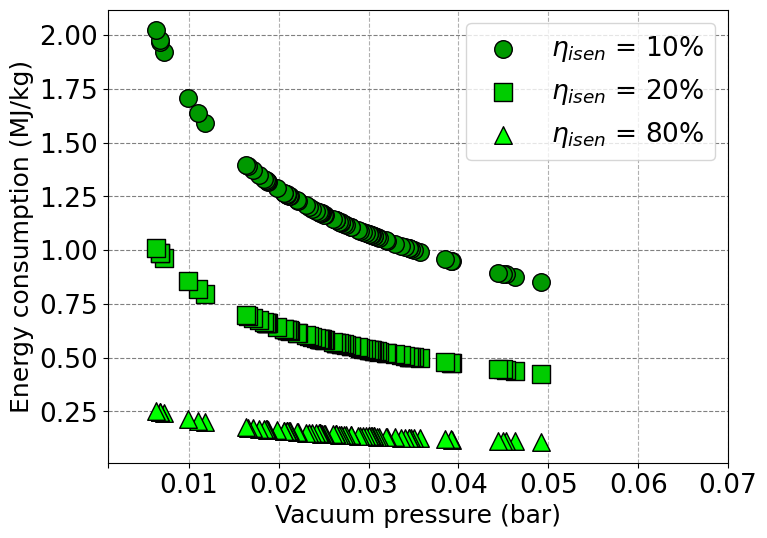

In [128]:
## Normal
fig_o2,ax_o2 = plt.subplots(figsize = [8,6],dpi = 100)
ax_o2.scatter(Popt_sort_e,E_consu_sort_10/146060, color =[0,0.6,0],
              edgecolor = 'black',
              label = '$\eta_{ isen}$ = 10%',s = 160 )


ax_o2.scatter(Popt_sort_e,E_consu_sort_20/146060, color =[0,0.8,0],
              edgecolor = 'black',marker = 's',
              label = '$\eta_{ isen}$ = 20%',s = 160 )

ax_o2.scatter(Popt_sort_e,E_consu_sort_80/146060, color =[0,1,0],
              edgecolor = 'black',marker = '^',              
              label = '$\eta_{ isen}$ = 80%',s = 160 )

plt.legend(fontsize = 19)
#ax_o2.set_xscale('log')

#ax_o2.set_title('Optimal Vacuum Pressure \nof VSA Processes',fontsize = 18.5)
#ax_o2.set_xticks([0.003,0.005,0.01,0.02,0.05,0.08])
#ax_o2.set_xticklabels([0.003,0.005,0.01,0.02,0.05,0.08],fontsize = 14)

ax_o2.set_xticks([0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07])
ax_o2.set_xticklabels([None,0.01,0.02,0.03,0.04,0.05,0.06,0.07],
                      fontsize = 19,rotation = 0)

plt.yticks(fontsize = 19)

ax_o2.set_ylabel('Energy consumption (MJ/kg)',fontsize = 18)
ax_o2.set_xlabel('Vacuum pressure (bar)',fontsize = 18)

plt.grid(which = 'major', ls='--')
ax_o2.set_axisbelow(True)
ax_o2.yaxis.grid(color='gray', linestyle='dashed')
fig_o2.savefig('P_E_diag_op2_normal.png')